In [ ]:
%pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/imaging_course/Notebooks/

/content/drive/.shortcut-targets-by-id/1cvJ2Hes9owrL3S12PvcKfeDnl8solhU_/imaging_course/Notebooks


In [ ]:
%ls

images/  Lezione1.ipynb  Lezione2.ipynb  V1_lezioni/


Adding noise and filtering 

In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import skimage
import pydicom as dicom
import matplotlib.pyplot as plt

from PIL import Image
from skimage import exposure
from skimage.util import random_noise

In [ ]:
img=cv2.imread("/content/drive/MyDrive/imaging_course/Notebooks/images/image_rgb.tiff",0)

Convolution 

In [ ]:
def conv2d(img, filt, padding=0): # padding=0 means we want no padding 
    M, N= img.shape
    m,n=filt.shape
    
    out=np.zeros((M-m+1, N-n+1))
    
    for ii in range (out.shape[0]): 
        for jj in range (out.shape[1]):
            out[ii, jj]= np.sum(filt * img[ii:(ii+m), jj:(jj+n)])
            
    return out

In [ ]:
# We make the filter as made of 1s
filt=np.ones ((5,5))/25 # It is like taking the mean of the image
print (filt)

# We can make another filter that is bigger than the first one 
filt1=np.ones ((19,19))
# Making sure to normalize the kernel 
filt1/= (np.sum(filt1)+1e-6)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Text(0.5, 1.0, 'Blurred')

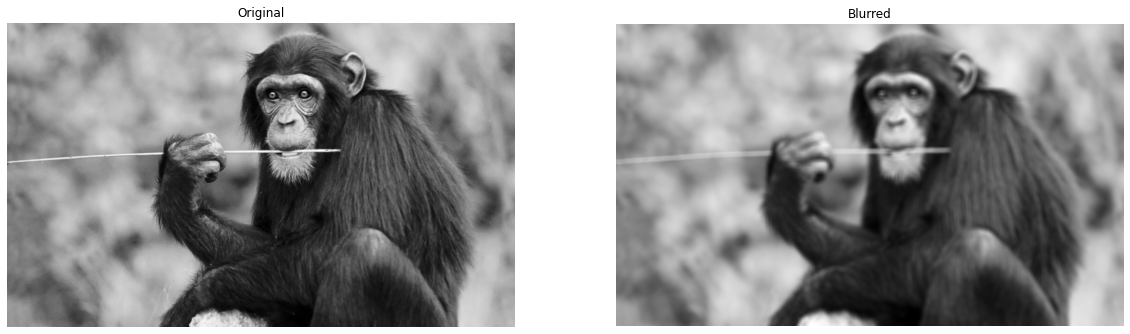

In [ ]:
output= conv2d (img, filt1)

fig=plt.figure(figsize=(20,8))

fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,2,2)
plt.imshow(output,cmap='gray')
plt.axis("off")
plt.title("Blurred")

Gaussian noise

In [ ]:
gauss_noise=np.zeros((img.shape[0], img.shape[1]),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

gn_img=cv2.add(img,gauss_noise)

Text(0.5, 1.0, 'Combined')

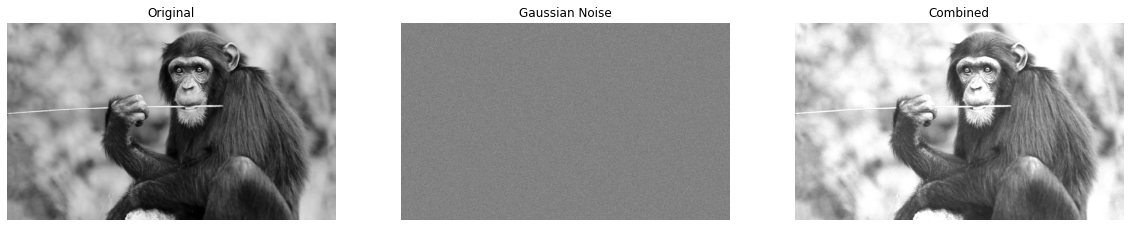

In [ ]:
fig=plt.figure(figsize=(20,8))

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

Denoising Gaussian with Gaussian filter

In [ ]:
kernel = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]
kernel = np.asarray (kernel)
kernel = (kernel/16).astype('float32')
blurred20 = cv2.filter2D(gn_img,-1,kernel)

Text(0.5, 1.0, 'Gaussian Filter')

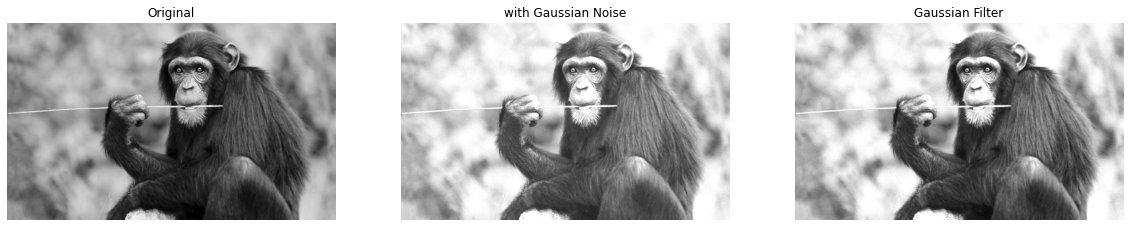

In [ ]:
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred20,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

In [ ]:
blurred21=cv2.GaussianBlur(gn_img,(3,3),0)

Text(0.5, 1.0, 'Gaussian Filter')

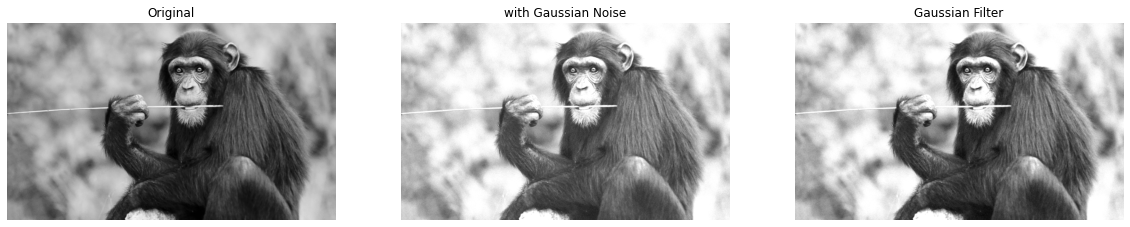

In [ ]:
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred21,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

Poisson noise

In [ ]:
poisson_noise = np.sqrt(img) * np.random.normal(0, 1, img.shape)

pn_img = img + poisson_noise
pn_img = pn_img.astype ('uint8')

Text(0.5, 1.0, 'Combined')

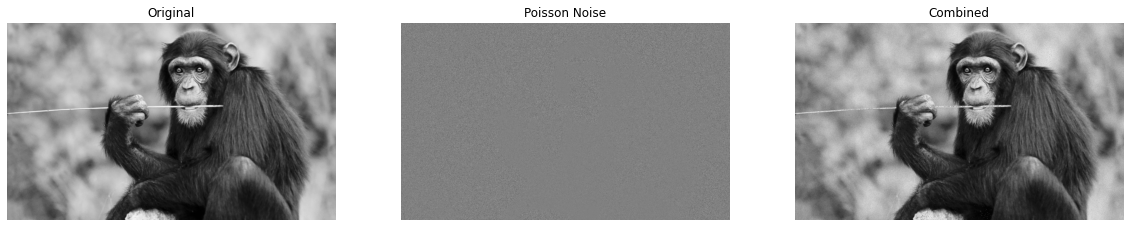

In [ ]:
fig=plt.figure(figsize=(20,8))

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(poisson_noise,cmap='gray')
plt.axis("off")
plt.title("Poisson Noise")

fig.add_subplot(1,3,3)
plt.imshow(pn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

Denoising with mean filter

In [ ]:
kernel = np.ones((5,5),np.float32)/25
denoised10 = cv2.filter2D(pn_img,-1,kernel)

Text(0.5, 1.0, 'After Denoising')

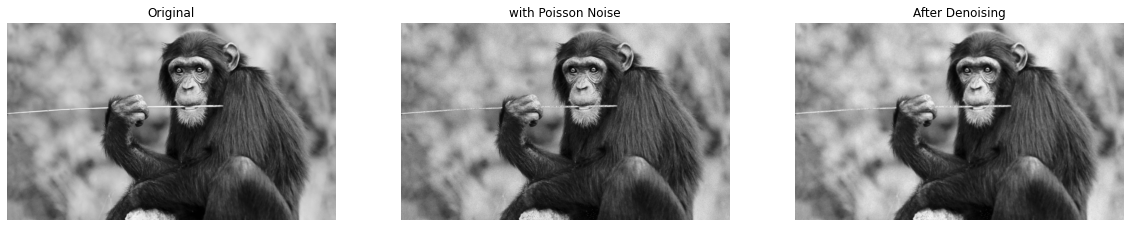

In [ ]:
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(pn_img,cmap='gray')
plt.axis("off")
plt.title("with Poisson Noise")

fig.add_subplot(1,3,3)
plt.imshow(denoised10,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

Text(0.5, 1.0, 'After Denoising')

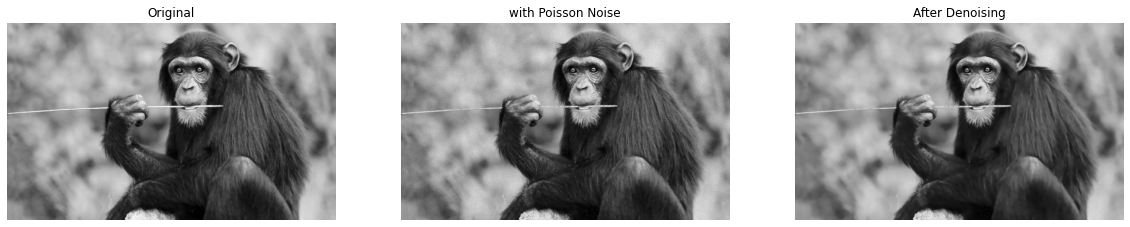

In [ ]:
denoised1=cv2.fastNlMeansDenoising(pn_img,None,10,10)

fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(pn_img,cmap='gray')
plt.axis("off")
plt.title("with Poisson Noise")

fig.add_subplot(1,3,3)
plt.imshow(denoised1,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

Salt and Pepper

In [ ]:
imp_noise=np.zeros((img.shape[0], img.shape[1]),dtype=np.uint8)
cv2.randu(imp_noise,0,255)
imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]

in_img=cv2.add(img,imp_noise)

Text(0.5, 1.0, 'Combined')

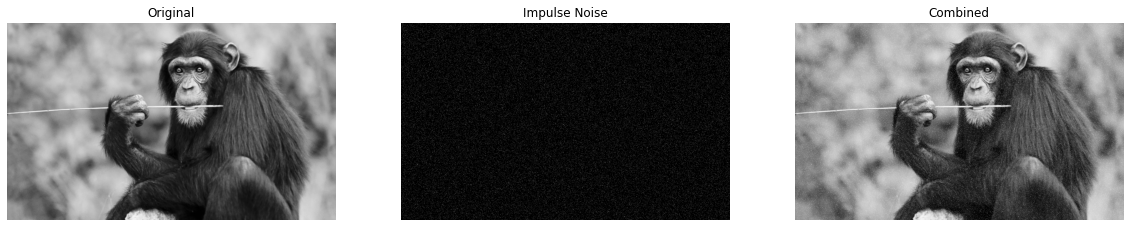

In [ ]:
fig=plt.figure(figsize=(20,8))

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imp_noise,cmap='gray')
plt.axis("off")
plt.title("Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

Denoising using Gaussian filter

In [ ]:
blurred3=cv2.GaussianBlur(in_img,(3,3),0)

Text(0.5, 1.0, 'Median Filter')

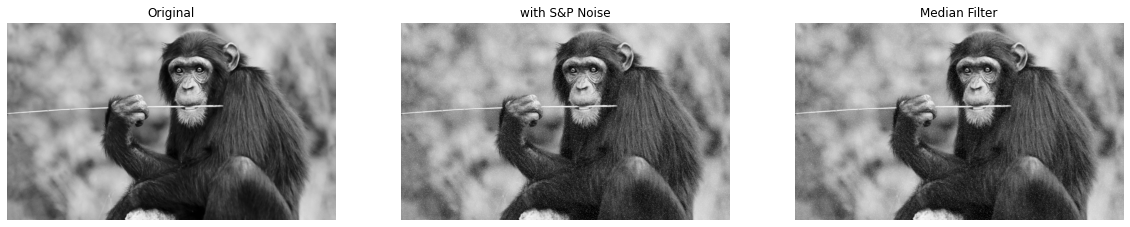

In [ ]:
fig=plt.figure(figsize=(20,8))

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with S&P Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred3,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

Denoising using median filter

In [ ]:
blurred31=cv2.medianBlur(in_img,3)

Text(0.5, 1.0, 'Median Filter')

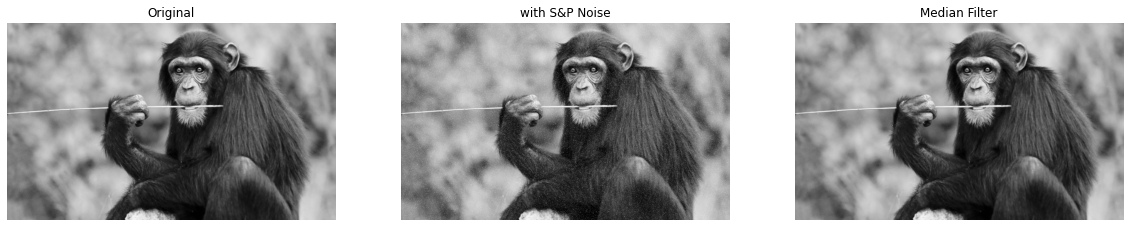

In [ ]:
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with S&P Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred31,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

Homomorphic filter

In [ ]:
img = cv2.imread('/content/drive/MyDrive/imaging_course/Notebooks/images/person.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
hh, ww = img.shape[:2]

# take ln of image
img_log = np.log(np.float64(img), dtype=np.float64)

# do dft saving as complex output
dft = np.fft.fft2(img_log, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# create black circle on white background for high pass filter
#radius = 3
radius = 13
mask = np.zeros_like(img, dtype=np.float64)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, 1, -1)
mask = 1 - mask

# antialias mask via blurring
mask = cv2.GaussianBlur(mask, (47,47), 0)

# apply mask to dft_shift
dft_shift_filtered = np.multiply(dft_shift,mask)

# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift_filtered)

# do idft saving as complex
img_back = np.fft.ifft2(back_ishift, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back)

# apply exp to reverse the earlier log
img_homomorphic = np.exp(img_back, dtype=np.float64)

# scale result
img_homomorphic = cv2.normalize(img_homomorphic, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

Text(0.5, 1.0, 'Homomorphic Filter')

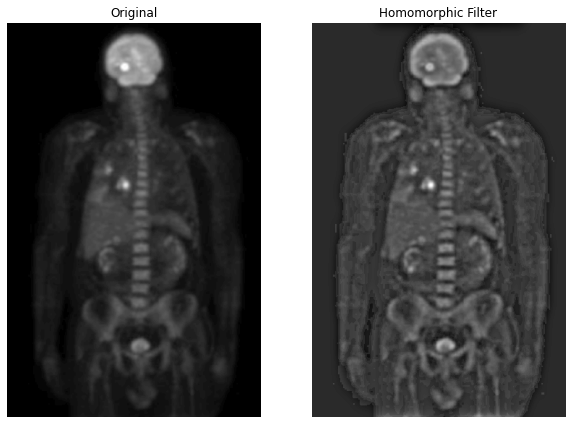

In [ ]:
fig=plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,2,2)
plt.imshow(img_homomorphic,cmap='gray')
plt.axis("off")
plt.title("Homomorphic Filter")